In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
weather=pd.read_csv("../data/weatherHistory.csv")
#weather.head()
print(weather.shape)
print(weather.columns.tolist())
#print(weather.describe())
#print(weather.isnull().sum())
#weather[weather.duplicated()]
weather=weather.dropna(subset=["Precip Type"])
print(weather.isnull().sum())

(96453, 12)
['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover', 'Pressure (millibars)', 'Daily Summary']
Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64


In [25]:
#checking date format
weather["Formatted Date"]=pd.to_datetime(weather["Formatted Date"],errors="coerce",utc=True)
weather

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 17:00:00+00:00,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 18:00:00+00:00,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 19:00:00+00:00,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 20:00:00+00:00,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [26]:
weather["Temperature (C)"]=weather["Temperature (C)"].round(2)
weather["Apparent Temperature (C)"]=weather["Apparent Temperature (C)"].round(2)
weather["Wind Speed (km/h)"]=weather["Wind Speed (km/h)"].round().astype(int)
weather["Wind Bearing (degrees)"]=weather["Wind Bearing (degrees)"].round(2).astype(int)
weather["Visibility (km)"]=weather["Visibility (km)"].round(2)

In [27]:
#basic EDA
weather.describe()
sns.set_theme(style='darkgrid',palette='pastel')


In [ ]:
#Temperature Distribution (Histogram + KDE)
plt.Figure(figsize=(12,6))
sns.histplot(data=weather,x="Temperature (C)",kde=True,bins=20)
plt.title("Temperature Distribution (°C)")
plt.savefig("../outputs/Temperature Distribution (Histogram + KDE).png", dpi=300, bbox_inches="tight")
plt.show()


In [ ]:
#Temperature Trends Over Time
plt.figure(figsize=(12,6))
sns.lineplot(data=weather,x="Formatted Date",y="Temperature (C)",errorbar=None)
plt.title("Daily Temperature Over Time (2006-2016)")
plt.xlabel("Year")
plt.ylabel("temperature (°C)")
plt.grid(True)
plt.savefig("../outputs/Temperature Trends Over Time.png", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
#Humidity vs. Rainfall
plt.figure(figsize=(12,6))
sns.scatterplot(data=weather,x="Humidity",y="Precip Type",palette="viridis",hue="Temperature (C)")
plt.title("Humidity vs. Rainfall (Colored by Temperature)")
plt.xlabel("Humidity")
plt.ylabel("Rainfall")
plt.grid(True)
plt.savefig("../outputs/Humidity vs. Rainfall.png", dpi=300, bbox_inches="tight")
plt.show()

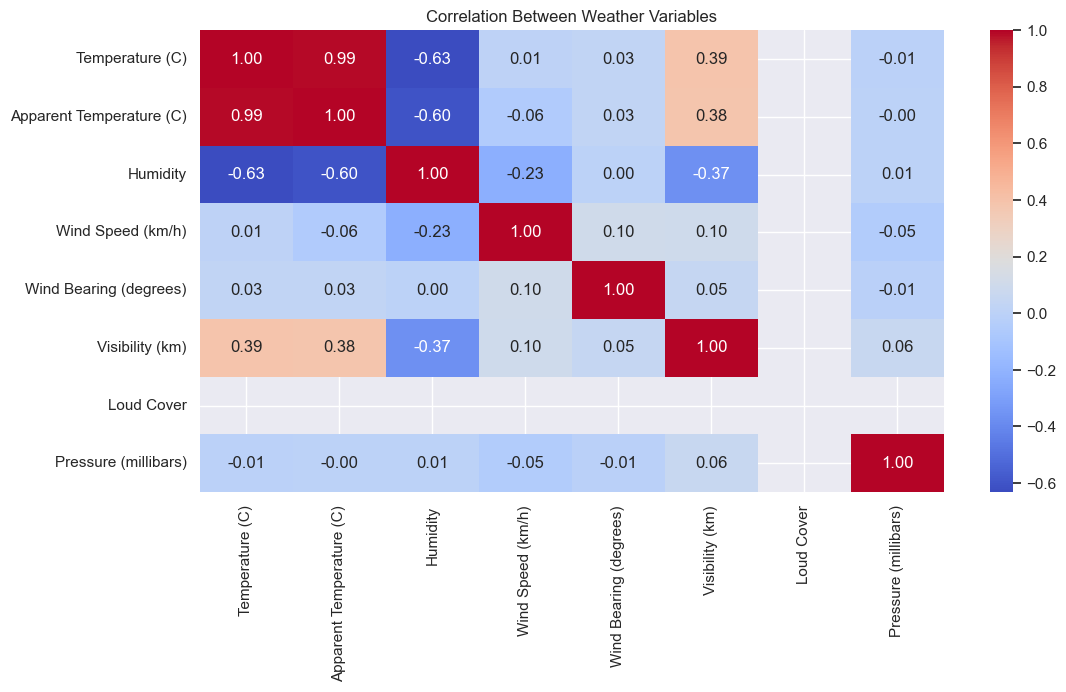

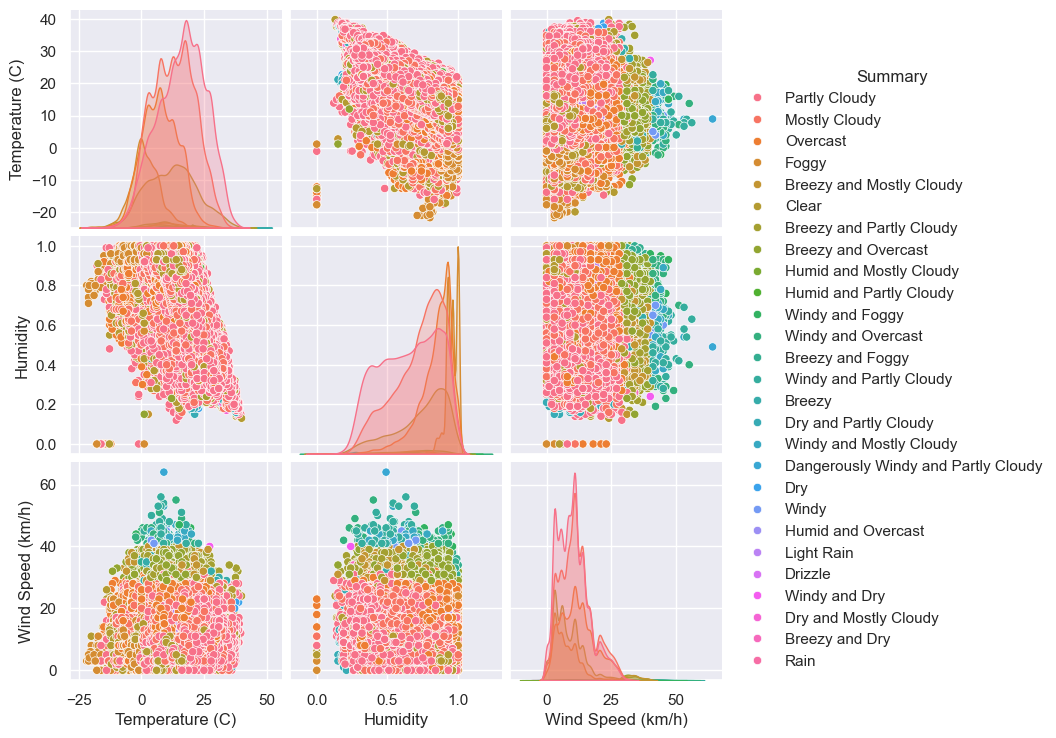

In [31]:
#Correlation Analysis
correlation_matrix=weather.select_dtypes(include='number').corr()
correlation_matrix

plt.figure(figsize=(12,6))
sns.heatmap(correlation_matrix,annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Correlation Between Weather Variables")
plt.savefig("../outputs/correlation_heatmap.png")
plt.show()

#pairplot

sns.pairplot(weather,vars=['Temperature (C)','Humidity','Wind Speed (km/h)'],hue=
"Summary")
plt.savefig("../outputs/pair_plot.png")
plt.show()

C:\Users\anisb\AppData\Local\Temp\ipykernel_12232\4012854743.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_temp=weather.set_index("Formatted Date").resample("M")["Temperature (C)"].mean()


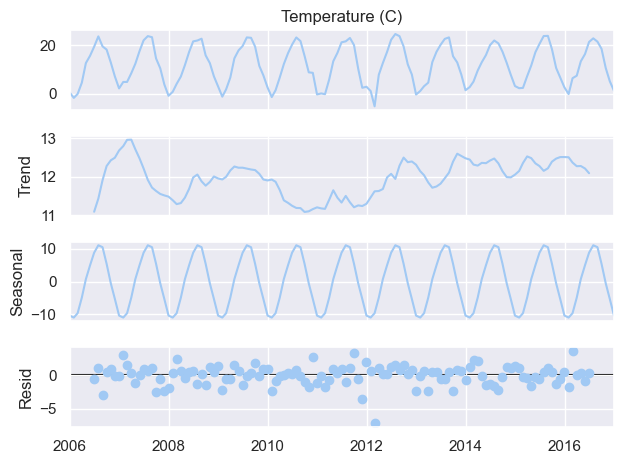

In [32]:
# Time-Series Decomposition
monthly_temp=weather.set_index("Formatted Date").resample("M")["Temperature (C)"].mean()
monthly_temp.head()
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(monthly_temp,model='adaptive')
decomposition.plot()
plt.savefig("../outputs/seasonal_decomposition.png")
plt.show()

In [33]:
#Confirm if summer temperatures are significantly hotter than winter
summer_temp=weather[weather["Formatted Date"].dt.month.isin([6,7,8])]
summer_temp=summer_temp["Temperature (C)"].to_list()
winter_temp=weather[weather["Formatted Date"].dt.month.isin([12,1,2])]
winter_temp=winter_temp["Temperature (C)"].to_list()

from scipy.stats import ttest_ind
t_stat,p_value=ttest_ind(summer_temp,winter_temp)
print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")



T-statistic: 411.14, P-value: 0.0000


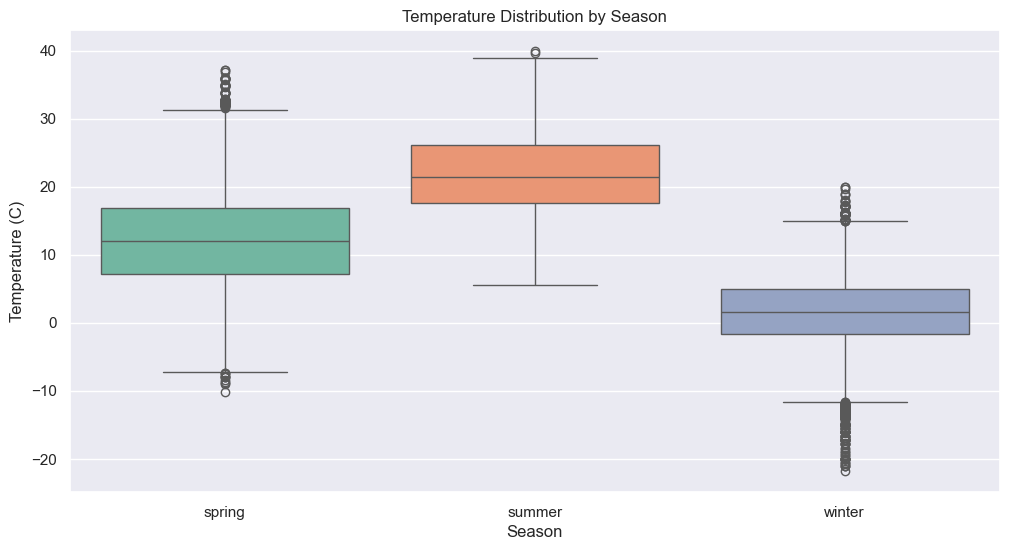

In [34]:
#Visualize temperature variability across seasons
weather["Month"]=weather["Formatted Date"].dt.month

def conv(month):
    if month in [6,7,8]:
        return "summer"
    elif month in [12,1,2]:
        return "winter"
    else:
        return "spring"

weather["Season"]=weather["Month"].apply(conv)
plt.figure(figsize=(12,6))
sns.boxplot(data=weather,x="Season",y="Temperature (C)",hue="Season",palette="Set2",legend=False)
plt.title("Temperature Distribution by Season")
plt.savefig("../outputs/seasonal_boxplot.png")
plt.show()

In [37]:
#weather.to_csv("C:/Users/anisb/Desktop/Weather Data Analysis/data/weatherHistory_cleaned.csv")
weather["Precip Type"].unique()

array(['rain', 'snow'], dtype=object)